In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_data=pd.read_csv('salary.csv')
salary_data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
x=np.array(salary_data['YearsExperience'])
y=np.array(salary_data['Salary'])
l=len(x)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)
lx=len(x_train)

$ \displaystyle h_{\theta}(x)=\theta_0+\theta_1x \mbox{ and } J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right)^2 $

$ \displaystyle\theta_j:=\theta_j-\alpha \frac{\partial}{\partial\theta_j}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) $

$ \displaystyle \frac{\partial}{\partial\theta_0}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right) = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right) $

$ \displaystyle \frac{\partial}{\partial\theta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\theta_0+\theta_1x^{(i)}-y^{(i)}\right).x^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})-y^{(i)}\right).x^{(i)} $

$ \displaystyle\mbox{ repeat until convergence }\left\{\theta_j:=\theta_j-\alpha\frac{\partial}{\partial\theta_j}f(\theta_0,\theta_1)\mbox{ for j=0,1} \right\} $

In [121]:
class mini_batch_gradient_descent:
    
    def create_batch(self,x_train,y_train,batch_size):
        mini_batches=[]
        data=np.stack((x_train,y_train),axis=1)
        np.random.shuffle(data)
        no_of_batches=x_train.shape[0]//batch_size
        for i in range(no_of_batches):
            mini_batch=data[i*batch_size:(i+1)*batch_size]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        if x_train.shape[0]%batch_size!=0:
            mini_batch=data[(i+1)*batch_size:]
            mini_batches.append((mini_batch[:,0],mini_batch[:,1]))
        return mini_batches
    
    def fit(self,x_train,y_train,alpha,epochs,batch_size):
        self.m=np.random.randn(1,1)
        self.c=np.random.randn(1,1)
        l=len(x_train)
        for i in range(epochs):
            batches=self.create_batch(x_train,y_train,batch_size)
            for batch in batches:
                xb=batch[0]
                yb=batch[1]
                xb=xb.reshape(1,xb.shape[0])
                intecept=np.sum((np.dot(self.m,xb)+self.c)-yb)
                slope=np.sum(((np.dot(self.m,xb)+self.c)-yb)*xb)
                self.m=self.m-alpha*(slope/l)
                self.c=self.c-alpha*(intecept/l)
    
    def slope_intercept(self):
        print(f"slope is {self.m[0][0]}")
        print(f"intecept is {self.c[0][0]}")
    
    def predict(self,x_test):
        x_test=x_test.reshape(x_test.shape[0],1)
        self.m=self.m.reshape(self.m.shape[1],self.m.shape[0])
        result=np.dot(x_test,self.m)+self.c
        return result

In [129]:
mgd=mini_batch_gradient_descent()

In [148]:
mgd.fit(x_train,y_train,0.01,4000,4)

In [149]:
mgd.slope_intercept()

slope is 9673.852015625836
intecept is 25237.295695453966


In [150]:
y_pred=mgd.predict(x_test)

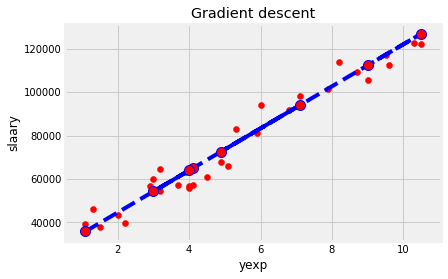

In [151]:
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

In [152]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

In [153]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

33388861.7721548
5778.309594695909
5607.95491546728
0.9608854333734218
0.9543857044165449
